In [1]:
####### dropout resnet18 vs without dropout
#### 
import torch
import sys
sys.path.append("..")
import numpy as np

REF_PATH = "/home/yifan/experiments/noise/20/experiment1"
CONFIG_PATH = "/home/yifan/experiments/noise/20"
CLEAN_PATH = "/home/yifan/dataset/clean/pairflip/cifar10/0"

# CLEAN_PATH = "/home/yifan/Exp/Noise/0.2/experiment1"
# CONFIG_PATH = "/home/yifan/experiments/noise/20"
# REF_PATH = "/home/yifan/dataset/clean/pairflip/cifar10/0"


ENCODER_DIMS=[512,256,256,256,256,2]
DECODER_DIMS= [2,256,256,256,256,512]
VIS_MODEL_NAME = 'baseline'

DEVICE='cuda:1'
########## initulize reference data and target data
from AlignVis.DataInit import DataInit
REF_EPOCH = 200
TAR_EPOCH = 200
ref_datainit = DataInit(CONFIG_PATH,REF_PATH,REF_EPOCH,DEVICE)
tar_datainit = DataInit(CLEAN_PATH,CLEAN_PATH,TAR_EPOCH,DEVICE)
ref_model, ref_provider, ref_train_data, ref_prediction, ref_prediction_res, ref_scores = ref_datainit.getData()
tar_model, tar_provider, tar_train_data, tar_prediction, tar_prediction_res, tar_scores = tar_datainit.getData()


from AlignVis.ReferenceGenerator import ReferenceGenerator
gen = ReferenceGenerator(ref_provider=ref_provider, tar_provider=tar_provider,REF_EPOCH=REF_EPOCH,TAR_EPOCH=TAR_EPOCH,ref_model=ref_model,tar_model=tar_model,DEVICE=DEVICE)

absolute_alignment_indicates,predict_label_diff_indicates,predict_confidence_Diff_indicates,high_distance_indicates = gen.subsetClassify(18,1.0,0.3,0.05)


from AlignVis_Visualizer.visualizer import visualizer
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)

I = np.eye(512)
projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")
vis = visualizer(ref_provider, I,I, np.dot(ref_provider.train_representation(TAR_EPOCH),I), projector, 200,[0,1],'tab10')


/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NameError: name 'REF_PATH' is not defined

In [2]:
TAR_PATH = CLEAN_PATH

In [4]:
from AlignVis.autoencoder_generator import AutoEncoderGenerator
AutoEncoder_Generator = AutoEncoderGenerator(REF_PATH, REF_PATH, TAR_PATH, TAR_PATH, 200,200, projector, DEVICE)

NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 3905.83it/s]


NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 4238.35it/s]


In [6]:
import os
if os.path.exists(os.path.join(TAR_PATH, "pre_autoencoder_nois.npy")):
    print("continue")
    autoencoder = AutoEncoder_Generator.encoder_trainer_with_pre_trained(os.path.join(TAR_PATH, "pre_autoencoder_nois.npy"), os.path.join(TAR_PATH, "pre_autoencoder_nois.npy"),batch_size=500,num_epochs=5,learning_rate=1e-4)
else:
    print("new one")
    autoencoder = AutoEncoder_Generator.encoder_trainer(os.path.join(TAR_PATH, "pre_autoencoder_nois.npy"),batch_size=500,num_epochs=10)

new one
NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 4779.14it/s]


NET resnet18
Finish initialization...


100%|██████████| 3/3 [00:00<00:00, 3968.12it/s]


Epoch [1/10], Loss: 107.0519, Loss decoder: 0.0019,Loss encoder: 0.0013,flip_loss: 142.7919158935547,pred_loss:105.60343933105469,loss_contrastive0.0,cka_loss0.017370939254760742


100%|██████████| 3/3 [00:00<00:00, 3577.74it/s]


Epoch [2/10], Loss: 94.0454, Loss decoder: 0.0015,Loss encoder: 0.0014,flip_loss: 123.2954330444336,pred_loss:92.78860473632812,loss_contrastive0.0,cka_loss0.020950796082615852


100%|██████████| 3/3 [00:00<00:00, 8076.32it/s]


Epoch [3/10], Loss: 77.6205, Loss decoder: 0.0014,Loss encoder: 0.0014,flip_loss: 125.47338104248047,pred_loss:76.3497085571289,loss_contrastive0.0,cka_loss0.01333314273506403


100%|██████████| 3/3 [00:00<00:00, 5538.25it/s]


Epoch [4/10], Loss: 60.8156, Loss decoder: 0.0013,Loss encoder: 0.0014,flip_loss: 126.17526245117188,pred_loss:59.54133605957031,loss_contrastive0.0,cka_loss0.009800673462450504


100%|██████████| 3/3 [00:00<00:00, 4042.05it/s]


Epoch [5/10], Loss: 44.0234, Loss decoder: 0.0012,Loss encoder: 0.0014,flip_loss: 127.3309326171875,pred_loss:42.738643646240234,loss_contrastive0.0,cka_loss0.008808553218841553


100%|██████████| 3/3 [00:00<00:00, 4757.24it/s]


Epoch [6/10], Loss: 29.9917, Loss decoder: 0.0011,Loss encoder: 0.0015,flip_loss: 128.2475128173828,pred_loss:28.69988250732422,loss_contrastive0.0,cka_loss0.00679051922634244


100%|██████████| 3/3 [00:00<00:00, 5193.11it/s]


Epoch [7/10], Loss: 19.6065, Loss decoder: 0.0010,Loss encoder: 0.0015,flip_loss: 127.02308654785156,pred_loss:18.326894760131836,loss_contrastive0.0,cka_loss0.006876587867736816


100%|██████████| 3/3 [00:00<00:00, 4901.80it/s]


Epoch [8/10], Loss: 12.9074, Loss decoder: 0.0010,Loss encoder: 0.0016,flip_loss: 127.03591918945312,pred_loss:11.627711296081543,loss_contrastive0.0,cka_loss0.00677114725112915


100%|██████████| 3/3 [00:00<00:00, 4226.71it/s]


Epoch [9/10], Loss: 8.4153, Loss decoder: 0.0009,Loss encoder: 0.0017,flip_loss: 130.43243408203125,pred_loss:7.102199554443359,loss_contrastive0.0,cka_loss0.006228506565093994


100%|██████████| 3/3 [00:00<00:00, 2952.35it/s]


Epoch [10/10], Loss: 5.4222, Loss decoder: 0.0009,Loss encoder: 0.0017,flip_loss: 123.52908325195312,pred_loss:4.177453994750977,loss_contrastive0.0,cka_loss0.00685805082321167


In [11]:
from AlignVisAutoEncoder.autoencoder import SimpleAutoencoder
autoencoder = SimpleAutoencoder(512,512)
checkpoint = torch.load("/home/yifan/projects/deepdebugertool/DLVisDebugger/AlignVisAutoEncoder/checkpoints/ref_noise.pth")
autoencoder.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

Computing decision regions ...


100%|██████████| 250/250 [00:00<00:00, 8602.64it/s]


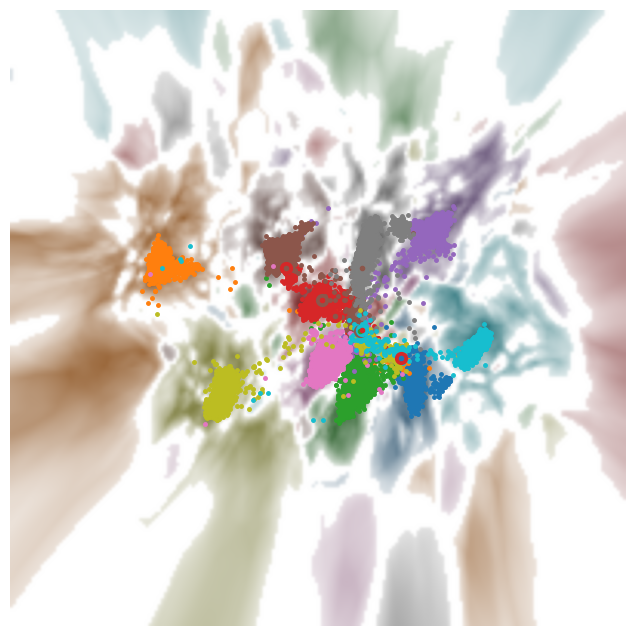

In [12]:
##### visuallize all data
import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)
VIS_MODEL_NAME = 'baseline'
projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")
Y = torch.Tensor(tar_provider.train_representation(TAR_EPOCH))
encoded_Y = autoencoder.encoder(Y)
I = np.eye(512)
from AlignVis_Visualizer.visualizer import visualizer
# from representationTrans.visualizer import visualizer
vis = visualizer(tar_provider, ref_provider, autoencoder, np.dot(encoded_Y.detach().numpy(), I), projector, 200,[],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(REF_EPOCH, path=os.path.join(TAR_PATH, "vis.png"))

In [9]:
from AlignVis_eval.AlignEval import Evaluator
eval = Evaluator(projector,ref_provider,tar_provider,REF_EPOCH,TAR_EPOCH)
# eval.eval_boundary_nn_autoencoder(tar_border_centers, autoencoder)

In [13]:
eval.eval_nn_train_autoencoder(15,autoencoder)

Thu May 11 14:39:23 2023 Building RP forest with 16 trees
Thu May 11 14:39:24 2023 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	Stopping threshold met -- exiting after 4 iterations
Thu May 11 14:39:26 2023 Building RP forest with 16 trees
Thu May 11 14:39:26 2023 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	Stopping threshold met -- exiting after 2 iterations
#train# nn preserving for autoencoder: 1.22/15 in epoch 200


1.22064

In [14]:
eval.eval_ppr_autoencoder(autoencoder)

100%|██████████| 250/250 [00:00<00:00, 8506.68it/s]

#train# autoencoder PPR: 0.97 in epoch 200


0.9677

In [15]:
from CKA_utils.CKA import CKA, CudaCKA
np_cka = CKA()
encoded_Y = autoencoder.encoder(torch.Tensor(tar_train_data))
encoded_Y = encoded_Y.detach().numpy()
# indicates = np.random.choice(aligned, size=10, replace=False)
indicates = np.random.choice(np.arange(5000), size=1000, replace=False)
print('CKA between absolute alignmnet subset is:',np_cka.kernel_CKA(tar_train_data[indicates],encoded_Y[indicates]))

CKA between absolute alignmnet subset is: 0.999191127134816


In [16]:
eval.eval_move_direction_preserving(autoencoder,10,1.5)

100%|██████████| 250/250 [00:00<00:00, 8494.55it/s]


long distance move subet number is 28776, short distance move set number is 33


100%|██████████| 250/250 [00:00<00:00, 8451.49it/s]


all reference distance preserving 49143/50000
all target distance preserving 49545/50000
short distance move direction preserving 30/33
long distance move direction preserving 28032/28776


In [17]:
val_same, val_diff = eval.eval_prediction_preserving(autoencoder)

100%|██████████| 250/250 [00:00<00:00, 8461.38it/s]

refere  predction preserving:45652/50000 0.91
target  predction preserving:48385/50000 0.97
ref&tar pred_same preserving:37401/39958 0.94
ref&tar pred_diff preserving:9700/10042 0.97


In [23]:
DEVICE="cuda:1"
####### generate boundary ponits for tar and ref respectively
from AlignVis.AlignmentBoundaryGenerator import AlignmentBoundaryGenerator
BoundaryGen = AlignmentBoundaryGenerator(REF_PATH,REF_PATH,TAR_PATH,TAR_PATH,REF_EPOCH,TAR_EPOCH,DEVICE)
ref_boundary,tar_boundary = BoundaryGen.get_boundary_point(DEVICE,num_adv_eg=1000)
import torch
###### get border sample features
import torch.nn as nn

ref_feature_model = ref_model.to(DEVICE)
ref_feature_model = nn.Sequential(*list(ref_feature_model.children())[:-1])
with torch.no_grad():
    features = ref_feature_model(ref_boundary)
    ref_features = features.view(ref_boundary.shape[0], -1)

###### get border sample features
tar_feature_model = tar_model.to(DEVICE)
tar_feature_model = nn.Sequential(*list(tar_feature_model.children())[:-1])
with torch.no_grad():
    tar_features = tar_feature_model(tar_boundary)
    tar_features = tar_features.view(tar_boundary.shape[0], -1)

NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 6394.15it/s]


NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:54<00:00,  4.59it/s]


conf1 (5001, 10) (5000, 10) (5001, 10) (5000, 10)
conf1 (5000, 10) (4999, 10) (5000, 10) (4999, 10)
conf1 (5001, 10) (4999, 10) (5001, 10) (4999, 10)
conf1 (5000, 10) (4999, 10) (5000, 10) (4999, 10)
conf1 (5001, 10) (4999, 10) (5001, 10) (4999, 10)
conf1 (5001, 10) (5000, 10) (5001, 10) (5000, 10)
conf1 (5001, 10) (4999, 10) (5001, 10) (4999, 10)
conf1 (5001, 10) (4999, 10) (5001, 10) (4999, 10)
conf1 (5000, 10) (5001, 10) (5000, 10) (5001, 10)
conf1 (5000, 10) (5000, 10) (5000, 10) (5000, 10)
conf1 (5000, 10) (4999, 10) (5000, 10) (4999, 10)
conf1 (5000, 10) (5001, 10) (5000, 10) (5001, 10)
conf1 (4999, 10) (5000, 10) (4999, 10) (5000, 10)
conf1 (5000, 10) (4999, 10) (5000, 10) (4999, 10)
conf1 (5000, 10) (4999, 10) (5000, 10) (4999, 10)
conf1 (5000, 10) (4999, 10) (5000, 10) (4999, 10)
conf1 (5001, 10) (4999, 10) (5001, 10) (4999, 10)
conf1 (5000, 10) (5000, 10) (5000, 10) (5000, 10)
conf1 (5001, 10) (5000, 10) (5001, 10) (5000, 10)
conf1 (5001, 10) (5000, 10) (5001, 10) (5000, 10)


In [24]:
import os
location_R = os.path.join(TAR_PATH, "Model","Epoch_{:d}".format(TAR_EPOCH), "aligned_ref_border.npy")
location_T = os.path.join(TAR_PATH, "Model","Epoch_{:d}".format(TAR_EPOCH), "aligned_tar_border.npy")
np.save(location_R, ref_b_features)
np.save(location_T, tar_b_features)

In [9]:
ref_border_centers_loc = os.path.join(TAR_PATH,"Model", "Epoch_{:d}".format(TAR_EPOCH),
                                          "aligned_ref_border.npy")
ref_b_features = np.load(ref_border_centers_loc).squeeze()

In [10]:
tar_border_centers_loc = os.path.join(TAR_PATH,"Model", "Epoch_{:d}".format(TAR_EPOCH),
                                          "aligned_tar_border.npy")
tar_b_features = np.load(tar_border_centers_loc).squeeze()

In [11]:
eval.eval_boundary_nn_ref_in_ref(ref_b_features)

#train# boundary preserving: 2.04/15 in epoch 200


2.03806

In [12]:
eval.eval_boundary_nn_autoencoder(tar_b_features,autoencoder,15)

#train# boundary preserving: 0.02/15 in epoch 200


0.0167

In [13]:
def eval_boundary_align_sensitivity(autoencoder, tar_b_features, ref_b_features):
        ############## init ###################
        #init target
        print("123")
        tar_b_pred = tar_provider.get_pred(TAR_EPOCH, tar_b_features)
        tar_b_pred = tar_b_pred + 1e-8
        tar_sort_preds = np.sort(tar_b_pred, axis=1)
        tar_diff = (tar_sort_preds[:, -1] - tar_sort_preds[:, -2]) / (tar_sort_preds[:, -1] - tar_sort_preds[:, 0])
        tar_border = np.zeros(len(tar_diff), dtype=np.uint8) + 0.05
        tar_border[tar_diff < 0.15] = 1

        #init reference
        ref_b_pred = ref_provider.get_pred(REF_EPOCH, ref_b_features)
        ref_b_pred = ref_b_pred + 1e-8
        ref_sort_preds = np.sort(ref_b_pred, axis=1)
        ref_diff = (ref_sort_preds[:, -1] - ref_sort_preds[:, -2]) / (ref_sort_preds[:, -1] - ref_sort_preds[:, 0])
        ref_border = np.zeros(len(ref_diff), dtype=np.uint8) + 0.05
        ref_border[ref_diff < 0.15] = 1
        
        ##### get all boundary list
        all_boundary_list = []
        
        for i in range(len(ref_border)):
            if ref_border[i] == 1 and tar_border[i] == 1:
                all_boundary_list.append(i)
        print(len(all_boundary_list))
        #### get ref low dimensional border
        ref_b_embedding = projector.batch_project(REF_EPOCH, ref_b_features)
        ref_b_inv = projector.batch_inverse(REF_EPOCH,ref_b_embedding)
        ref_b_pred_l = ref_provider.get_pred(REF_EPOCH, ref_b_inv)
        ref_b_pred_l = ref_b_pred_l  + 1e-8
        ref_sort_preds_l  = np.sort(ref_b_pred_l , axis=1)
        ref_diff_l  = (ref_sort_preds_l[:, -1] - ref_sort_preds_l[:, -2]) / (ref_sort_preds_l[:, -1] - ref_sort_preds_l[:, 0])
        ref_border_l = np.zeros(len(ref_diff_l), dtype=np.uint8) + 0.05
        ref_border_l[ref_diff_l < 0.15] = 1
        
        #### get target low dimensional border
        tar_b_embedding = projector.batch_project(REF_EPOCH, autoencoder.encoder(torch.Tensor(ref_b_features)).detach().numpy())
        tar_b_inv = projector.batch_inverse(REF_EPOCH,tar_b_embedding)
        tar_b_inv = autoencoder.decoder(torch.Tensor(tar_b_inv)).detach().numpy()
        tar_b_pred_l = tar_provider.get_pred(REF_EPOCH, tar_b_inv)
        tar_b_pred_l = tar_b_pred_l  + 1e-8
        tar_sort_preds_l  = np.sort(tar_b_pred_l , axis=1)
        tar_diff_l  = (tar_sort_preds_l[:, -1] - tar_sort_preds_l[:, -2]) / (tar_sort_preds_l[:, -1] - tar_sort_preds_l[:, 0])
        tar_border_l = np.zeros(len(tar_diff_l), dtype=np.uint8) + 0.05
        tar_border_l[tar_diff_l < 0.15] = 1

        all_boundary_list_l = []
       
        all_change = []
        all_change_l=[]
      
        for i in range(len(ref_border)):
            ##### low dimension all border
            if ref_border_l[i] == 1 and tar_border_l[i] == 1:
                all_boundary_list_l.append(i)
            if ref_border[i] != tar_border[i]:
                 all_change.append(i)
            if ref_border_l[i] != tar_border_l[i]:
                 all_change_l.append(i)
                 
                 
           


        print("boundary sample preserving{}/{}".format(len(all_boundary_list_l),len(all_boundary_list)))
        print("boundary change preserving{}/{}".format(len(all_change_l),len(all_change)))
       
eval_boundary_align_sensitivity(autoencoder,tar_b_features, ref_b_features)      

123


100%|██████████| 5/5 [00:00<00:00, 5317.32it/s]


580


100%|██████████| 5/5 [00:00<00:00, 9043.35it/s]

boundary sample preserving65/580
boundary change preserving403/420
